In [1]:
import matplotlib.pyplot as plt
import numpy as np

import metagames.functional as mf

In [6]:
default_agent_config = {
    'num_parameters': 10,
    'initializer': 'scaled_normal',
    'loss': 'utility',
    'optimizer': 'grad',
    'learning_rate': 1e-1,
    'step_rate': 1,
    'num_players': 1,
}
agent_configs = [
    {
        'agent': 'sum',
    },
    {
        'agent': 'selfish',
    },
    {
        'agent': 'linear',
    },
    {
        'agent': 'nn',
    },
    {
        'name': 'LinearDefect',
        'agent': 'linear',
        'loss': 'defect',
    }
]

In [7]:
data = mf.main.run_experiment(
    experiment='self_play_self_unaware',
    game='prisoners_dilemma',
    num_steps=1000,
    agents_config=agent_configs,
    default_agent_config=default_agent_config,
    agent_seed=1,
    parameter_seed=2,
)

False


In [8]:
step_idx = 0         # Global step
player_idx = 0       # Player index (in list of all players data['players']) 
player_step_idx = 0  # Player substep (may take multiple steps per global step)
round_idx = 0        # Substep gradient may be accumulated over multiple rounds with different opponents
data['steps'][step_idx]['player_updates'][player_idx][player_step_idx]['rounds'][round_idx]

{'opponent': PlayerSpecification(agent=SumAgent(), initializer=<function scaled_normal_initializer at 0x7f8b4c5d2f28>, loss=<class 'metagames.functional.losses.UtilityLoss'>, optimizer=<class 'torch.optim.sgd.SGD'>, learning_rate=0.1, step_rate=1, name='SumAgent'),
 'utility': array(0.39813794),
 'action_logit': array(-0.99099433),
 'opponent_action_logit': array(-0.99099433)}

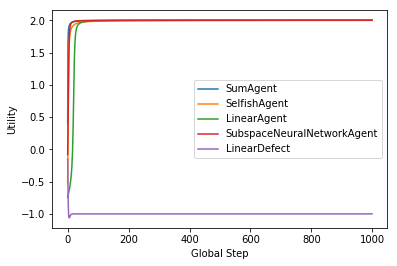

In [9]:
step_statistics = mf.data.experiment_step_statistics(data)
ax = plt.gca()
for player, player_stats in step_statistics.items():
    plt.plot(player_stats['utility']['mean'], label=player)

ax.legend()
ax.set_ylabel('Utility')
ax.set_xlabel('Global Step')
plt.show()